In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.float_format", lambda x: f"{x:,.6f}")
np.random.seed(42)

In [4]:
# --- Synthetic close-price series (replace with your CSV) ---
dates = pd.date_range(start="2022-01-01", periods=300, freq="B")
# Geometric Brownian-like random walk
drift = 0.0004
vol = 0.012
returns = np.random.normal(drift, vol, size=len(dates))
close = 100 * np.exp(np.cumsum(returns))

df = pd.DataFrame({"Date": dates, "Close": close}).set_index("Date")
df.head()

,Close
Date,
2022-01-03,100.638084
2022-01-04,100.511443
2022-01-05,101.336215
2022-01-06,103.246590
2022-01-07,102.998082


In [5]:
# .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2022-01-03 to 2023-02-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   300 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [6]:
# .describe()
df.describe(include="all")

,Close
count,300.000000
mean,99.121905
std,7.299962
min,88.431726
25%,92.508922
50%,97.230987
75%,106.603354
max,113.663311


In [7]:
# Missing counts
df.isna().sum()

Close    0
dtype: int64

In [8]:
# Feature 1: Daily Log Return
df["Log_Return"] = np.log(df["Close"] / df["Close"].shift(1))

# Feature 2: 20-day Moving Average & Ratio to trend
df["MA20"] = df["Close"].rolling(window=20, min_periods=20).mean()
df["MA_Ratio"] = df["Close"] / df["MA20"]

# Feature 3: 20-day Rolling Volatility (std of log returns)
df["Volatility20"] = df["Log_Return"].rolling(window=20, min_periods=20).std()

# Optional target: forward 5-day simple return
df["Future_5D_Return"] = df["Close"].shift(-5) / df["Close"] - 1

df.tail(10)

,Close,Log_Return,MA20,MA_Ratio,Volatility20,Future_5D_Return
Date,,,,,,
2023-02-13,107.407132,-0.002097,106.860457,1.005116,0.011962,-0.004812
2023-02-14,106.816304,-0.005516,106.943284,0.998813,0.011366,0.011958
2023-02-15,106.105957,-0.006672,106.914555,0.992437,0.011011,0.022906
2023-02-16,107.236151,0.010595,106.939547,1.002774,0.011276,0.022455
2023-02-17,107.739643,0.004684,107.050092,1.006441,0.010974,0.025805
2023-02-20,106.890259,-0.007915,107.086704,0.998166,0.011084,NaN
2023-02-21,108.093640,0.011195,107.168663,1.008631,0.011338,NaN
2023-02-22,108.536387,0.004088,107.308844,1.011439,0.011217,NaN
2023-02-23,109.644118,0.010154,107.497865,1.019966,0.011390,NaN


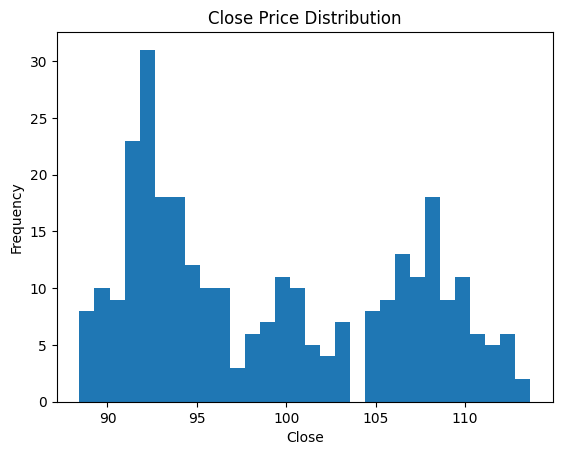

In [9]:
# Histogram: Close
plt.figure()
plt.hist(df["Close"].dropna().values, bins=30)
plt.title("Close Price Distribution")
plt.xlabel("Close")
plt.ylabel("Frequency")
plt.show()

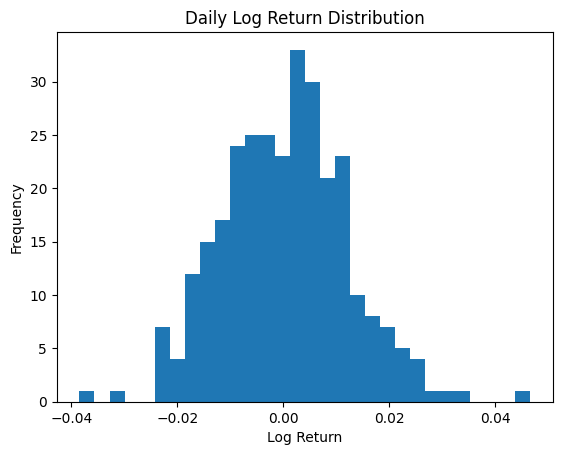

In [10]:
# Histogram: Log_Return
plt.figure()
plt.hist(df["Log_Return"].dropna().values, bins=30)
plt.title("Daily Log Return Distribution")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()

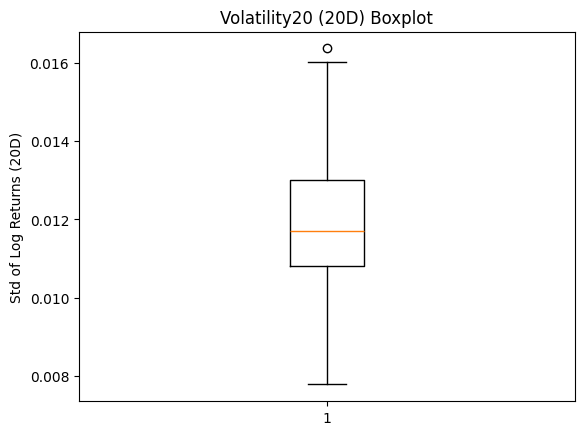

In [11]:
# Boxplot: Volatility20
plt.figure()
plt.boxplot(df["Volatility20"].dropna().values, vert=True)
plt.title("Volatility20 (20D) Boxplot")
plt.ylabel("Std of Log Returns (20D)")
plt.show()

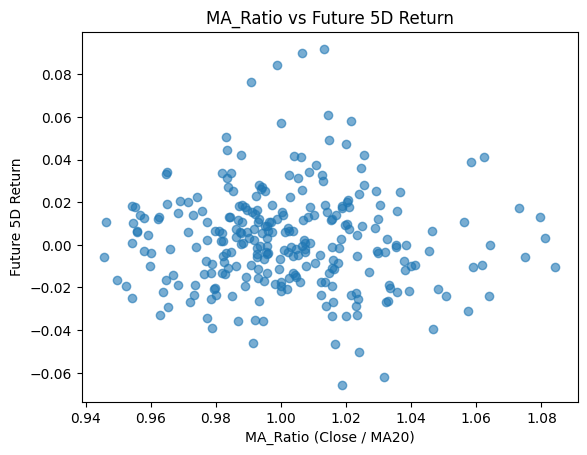

In [12]:
# Scatter: MA_Ratio vs Future_5D_Return
valid = df[["MA_Ratio", "Future_5D_Return"]].dropna()
plt.figure()
plt.scatter(valid["MA_Ratio"].values, valid["Future_5D_Return"].values, alpha=0.6)
plt.title("MA_Ratio vs Future 5D Return")
plt.xlabel("MA_Ratio (Close / MA20)")
plt.ylabel("Future 5D Return")
plt.show()

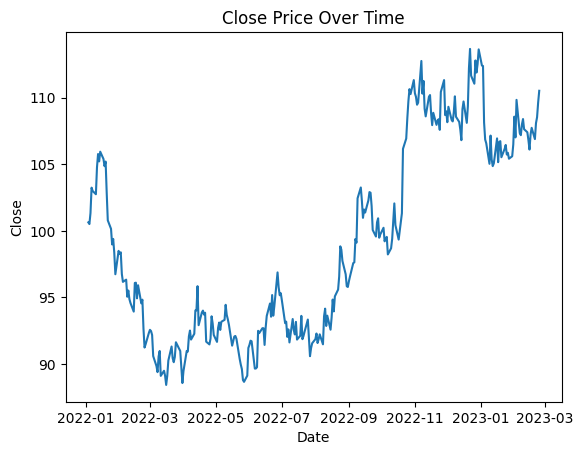

In [13]:
# Line: Close over time
plt.figure()
plt.plot(df.index, df["Close"].values)
plt.title("Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

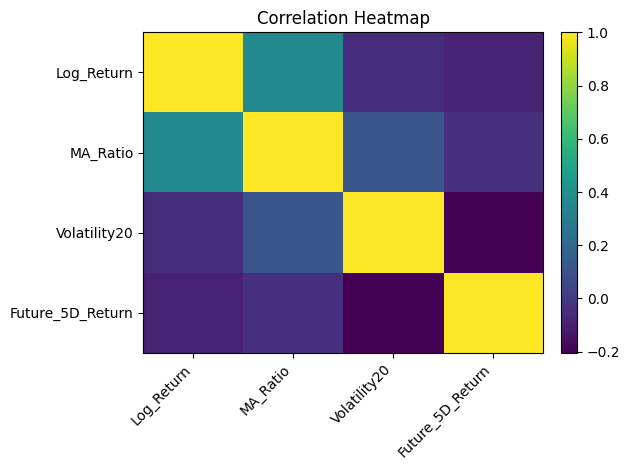

,Log_Return,MA_Ratio,Volatility20,Future_5D_Return
Log_Return,1.000000,0.366913,-0.048285,-0.090361
MA_Ratio,0.366913,1.000000,0.108444,-0.038968
Volatility20,-0.048285,0.108444,1.000000,-0.204312
Future_5D_Return,-0.090361,-0.038968,-0.204312,1.000000


In [14]:
corr_cols = ["Log_Return", "MA_Ratio", "Volatility20", "Future_5D_Return"]
corr_df = df[corr_cols].dropna()
corr = corr_df.corr()

plt.figure()
im = plt.imshow(corr, aspect="auto")
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45, ha="right")
plt.yticks(range(len(corr_cols)), corr_cols)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

corr